# MNIST 数据集
- 一组有美国高中生和人口调查局员工手写的 70 000 个数字的图片
- 每张图片都用其代表的数字标记
- 机器学习领域的 “hello world” ，广泛使用于分类算法


In [1]:
# sklearn 提供 datasets 功能来下载流行的数据集
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784")

# # 加载本地下载好的 MNIST 数据集，MATLAB保存的数据文件 .mat
# import scipy.io as scio 
# mnist = scio.loadmat('./datasets/mnist-original.mat')

mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


## sklearn 加载的数据集通常具有类似字典结构
- DESCR 键，描述数据集
- data 键，包含一个数组，每个实例为一行，每一特征为一列
- target 键，包含一个带有标记的数组


In [2]:
X, y = mnist["data"], mnist["target"]

X[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
y[:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

In [4]:
# There should be more than one value in the resulting array.
# If not, then perhaps what happened is that you used fetch_openml() to download MNIST, 
# and it returns labels as strings so when you defined y_train_5 = (y_train == 5), 
# it results an array full of False. 

# A solution is to cast y_train to int8: y_train = y_train.astype(np.uint8) 
# (which is what I do in the notebook, just after loading the data).
import numpy as np

y = y.astype(np.uint8)
y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

MNIST 数据集共有 7 万张图片，每张图片有 784 个特征

因为图片是 28 *28 = 784 像素，每个特征代表着一个像素的强度，从 0（白色）到 255（黑色）

查看数据集中的一个数字，随便选择一个实例的特征向量，将其重新形成一个 28 * 28 数组，然后使用 matplotlib 的 imshow 函数显示即可


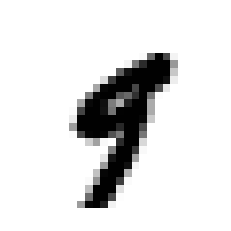

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [8]:
y[36000]

9

在开始研究数据集之前，首先应该创建一个测试集，并将其放在一边

对于 MNIST 数据集，实际上已经分成训练集（前6万）和测试集（最后1万）


In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


同样，需要将训练集数据洗牌
- 这样才能保证交叉验证时所有折叠都差不多（不希望某个折叠中丢一些数字）
- 算法对训练实例的顺序敏感，如果连续输入许多相似的实例，导致执行性能不佳
- 给数据进行洗牌，确保这样的情况不会发生


In [10]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


# 训练一个二元分类器
- 简化问题，只识别一个数字，如 9
- 那么检测数字 9 的检测器，就是一个二元分类器的例子
- 只能区分两个类别：9 和 非9


In [11]:
# 为此分类任务创建目标变量
# True for all 5s, False for all other digits
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)


接着挑选一个分类器进行训练
- 一个好的初始选择是随机梯度下降（SGD）分类器
- 使用 sklearn 的 SGDClassifier 类即可
- SGD 非常适合大型数据集


In [12]:
from sklearn.linear_model import SGDClassifier

# 由于 SGDClassifier 在训练时完全随机，希望得到复现的结果，需要设置参数 random_state=42
# 42 这个数字并无特殊含义，只是这个数字 42 是关乎 “ 关于生命、宇宙和一切的终极问题的答案 ” —— 《银河系搭车客指南》
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_9)

sgd_clf.predict([some_digit])

array([False])

# 性能考核
- 评估分类器比评估回归器要困难
- 使用交叉验证测量精度
- 实施交叉验证
    - 有时希望自定义（控制的更多），自行实施交叉验证，操作简单


In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_9):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_9[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_9[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))
    
# 每一折叠有 StratifiedKFold 执行分层抽样，其包含的各个类别的比例符合整体比例
# 每次迭代会创建一个分类器的副本，用训练集对这个副本进行训练，然后用测试集进行预测，最后计算正确预测的次数，输出正确预测的比率

# 现在用 cross_val_score() 函数评估 SGDClassifier 模型
# 采用 K-fold 交叉验证法，3 个折叠
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_9, cv=3, scoring="accuracy")

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9434
0.9128
0.9454


array([0.9434, 0.9128, 0.9454])

三次折叠交叉的准确率（正确率的比例）看起来不错

看一看另一个分类器，将每一张图片分类成 非9


In [14]:
from sklearn.base import BaseEstimator

class Never9Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
# 查看这个模型的准确度
never_9_clf = Never9Classifier()
cross_val_score(never_9_clf, X_train, y_train_9, cv=3, scoring="accuracy")

array([0.90215, 0.90165, 0.89875])

准确率都超过 90% ，这是因为大约 10% 的图形数字是 9， 所以猜一张图片不是9, 90%的概率都是正确的

这种现象表明，准确率通常无法成为分类器的首要性能指标，特别是处理 偏斜数据集（skewed dataset）的时候（即某些类比其他类更为频繁）


# 混淆矩阵
- 评估分类器性能的更好方法是混淆矩阵
- 总体思路就是统计A类别实例被分成B类别的次数
- 例如：想知道分类器将数字3和数字5混淆多少次，只需要通过混淆矩阵的第5行第3列来查看
- 计算混淆矩阵，需要先有一组预测才能将其与实际目标进行比较
- 当然可以使用测试集进行预测，但最好不用，可以用 cross_val_predict() 函数的结果代替


In [15]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3)


与 cross_val_score() 函数一样，cross_val_predict 函数同样执行 K-fold 交叉验证，但返回的不是评估分数，而是每个折叠的预测。

这意味对于每一个实例都可以得到一个干净的预测（“干净”的意思是模型预测时使用的数据，在其训练期间从未见到过）

可以使用 confusion_matrix() 函数来获取混淆矩阵，只需要给出目标类别（y_train_9）和预测类别（y_train_pred）


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_9, y_train_pred)

array([[51911,  2140],
       [ 1828,  4121]], dtype=int64)

混淆矩阵中的行表示实际类别，列表示预测类别。

本例中第一行表示所有 “非9”（负类）的图片：51608张被正确的分为“非9”类别（真负类），2443张被错误的分成“9”类别（假正类）

第二行表示所有“9”类别（正类）图片：1653张被错误分成“非9”类别（假负类），4296张被正确的分成“9”类别（真正类）

一个完美的分类器只有 真正类和真负类，故此其混淆矩阵只有正对角线（左上右下）有非零值


In [17]:
y_train_perfect_predictions = y_train_9
confusion_matrix(y_train_9, y_train_perfect_predictions)

array([[54051,     0],
       [    0,  5949]], dtype=int64)

混淆矩阵表示的信息量很大，有时需要指标简洁

正类预测的准确率是一个不错的指标，也被称之为分类器的精度（precision）

Precision = TP / ( TP + FP )

其中 TP 是真正类的数量，FP 是假正类的数量

一个单独的正类预测，并确保其正确，得到完美精度 精度 = 1 / 1 = 100%

当时这个完美精度没有任何意义，因为分类器会忽略这个正类实例之外的所有内容

因此精度通常与另一个指标一起使用，召回率（recall），也称之为灵敏度（sensitivity）或者真正类率（TPR）：是分类器正确检测到正类实例的比例

Recall = TP / ( TP + FP )

其中 FP 是假负类的数量

sklearn 提供了计算多种分类器指标的函数，精度和召回率就是其中

In [18]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_9, y_train_pred)

0.6582015652451685

In [19]:
recall_score(y_train_9, y_train_pred)

0.6927214657925702

可以将 精度 和 召回率 组合成为一个单一的指标，称之为 F1分数

F1 分数是精度和召回率的谐波平均值

F1 = 2 / ( 1 / precison + 1 / recall ) = 2 * ( (precision * recall) / (precision + recall) ) = TP / ( TP + (FN + FP ) / 2 )

正常的平均值平等对待所有值，而谐波平均值会给予较低的值更高的权重

因此，只有当召回率recall 和精度precision 都很高时，分类器才能得到较高的 F1分数


In [20]:
from sklearn.metrics import f1_score
f1_score(y_train_9, y_train_pred)

0.675020475020475

F1 分数对于那些具有相近的精度和召回率的分类器更为有利

这不一定符合期望，某些情况下只关心精度，某些情况下只关心召回率

鱼和熊掌不可兼得，不能同时增加精度并减少召回率，反之亦然，这称之为 精度/召回率权衡


# 精度 / 召回率权衡
- 要理解权衡过程，需要深入理解分类算法的决策策略
- 决策阈值的变化会影响精度和召回率
- sklearn 不允许直接设置阈值，但是可以访问它用于预测的决策分数，decision_function() 方法
- 该方法返回每一个实例的分数，然后可以根据这些分数，使用任意阈值进行预测


In [22]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-3599.6391789])

In [24]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [30]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

如何决定使用什么阈值
- 首先，使用 cross_val_predict() 函数获取训练集中所有实例的分数，需要返回的是决策分数而不是预测结果
- 有了这些分数后，使用 precision_racall_curve() 函数计算所有可能的阈值的精度和召回率
- 最后，使用 matplotlib 绘制精度和召回率相对于阈值的函数图


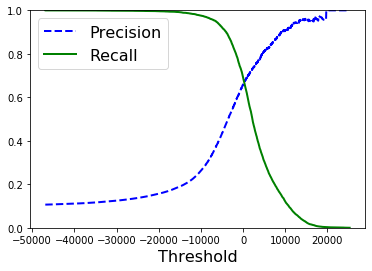

In [34]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3, method="decision_function")

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

精度和召回率的抉择，取决于项目工程的需求

# ROC 曲线
- 一种与二元分类器一起使用的工具，受试者工作特征曲线（简称 ROC ）
- 它与精度/召回率曲线非常相似，但绘制的不是精度和召回率，而是真正类率（召回率的另一名称而已）和假正类率（FPR）
- FPR 是被错误分为正类的负类实例比例 = 1 - 真负类率（TNR），后者是被正确分类为负类实例比例，也称之特异度
- ROC 曲线绘制的是灵敏度和（1-特异度）的关系
- 绘制 ROC 曲线，需要使用 roc_curve() 函数计算多种阈值的 TPR \ FPR
- 然后使用 matplotlib 绘制 FPR 对 TPR 的曲线


In [36]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_9, y_scores)

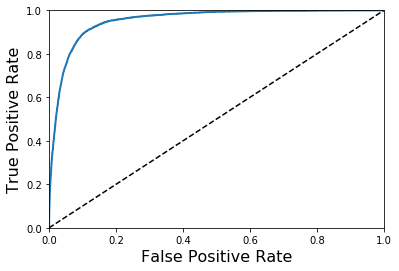

In [37]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plot_roc_curve(fpr, tpr)
plt.show()

同样的，对于 精度/召回率 曲线 和 ROC 曲线，都需要一个折中权衡

有一种比较分类器的方法是测量曲线下面积（AUC）
- 完美的分类器的 ROC AUC = 1
- 纯随机分类器的 ROC AUC = 0.5
- sklearn 提供计算 ROC AUC 的函数，roc_auc_score


In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_9, y_scores)

0.9533622701624145

ROC 曲线和精度/召回率曲线非常相似，使用哪一个
- 经验法则，当正类非常少见或者更关注假正类而是假负类时，选项 PR 曲线，反之则是 ROC 曲线

训练一个 RandomForestClassifier 分类器，比较 SGDClassifier 分类器的 ROC 曲线和 ROC AUC 分数


In [40]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_9, cv=3, method="predict_proba")


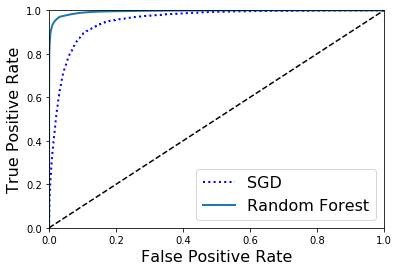

In [42]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_9,y_scores_forest)

plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()


In [44]:
roc_auc_score(y_train_9, y_scores_forest)

0.9955035742424136

再一次计算精度和召回率的分数

In [45]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_9, cv=3)
precision_score(y_train_9, y_train_pred_forest)

0.9821987480438185

In [47]:
recall_score(y_train_9, y_train_pred_forest)

0.8440073962010421

# 多类别分类器
- 多项分类器，可以区分两个以上的类别
- 随机森林分类器和朴素贝叶斯分类器 算法都可以直接处理多个类别
- 严格的二分类器，如 支持向量机分类器和线性分类器
- 有多种策略可以用几个二元分类器实现多类别的目的

## solution one 
- 创建系统识别数字图片分成 10 类（0-9）
- 训练 10 个二元分类器，每个数字一个分类器（0-检测器，1-检测器，以此类推）
- 然后当需要对图片分类时，获取每个分类器的决策分数，那个分数高就是那个类别
- 这称之为 一对多（OvA）策略（one-versus-the-rest）

## solutin two
- 为每一对数字训练一个分类器
- 一个区别 0 和 1，一个区别 0 和 2，以此类推
- 这称之为 一对一（OvO）策略
- 需要训练（ N * (N-1) ）/ 2 个分类器
- 分类图片时，需要运行 45 个分类器，最后那个类别获胜最多
- 优势在于每个分类器只需要用到部分训练集对其必须区分的两个类别进行训练

sklearn 可以检测到尝试使用二分类算法进行多类别分类任务时，自动运行OvA( SVM 除外，使用 OvO )


In [48]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])


array([9], dtype=uint8)

以上这段代码使用原始目标类别 0 到 9 （y_train）在训练集上对 SGDClassifier 进行训练，
在内部，sklearn 实际上训练了 10 个分类器，获得这些分类器对图片的决策分数，然后选择分数最高的类别

想知道是不是这样，可以调用 decision_function() 方法，返回 10 个分数


In [49]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores


array([[-24547.87596331, -25482.04005535, -14952.41422648,
         -4650.34533382,  -3396.36088808,  -2970.60617855,
        -31280.78539037,  -9270.36476866,  -5136.99081681,
         -2362.4344661 ]])

最高分数应该对应数字9这个类别


In [50]:
np.argmax(some_digit_scores)


9

In [51]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [52]:
sgd_clf.classes_[9]

9

当训练分类器时，目标类别的列表会储存在 classes_ 属性中，按照值的大小排序

如果想要强制 sklearn 使用 一对一 或者 一对多 策略，使用使用 OneVsOneClassifier 或者 OneVsRestClassifier 类


In [53]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([9], dtype=uint8)

In [54]:
len(ovo_clf.estimators_)

45

训练 随机森林分类器 同样简单

In [55]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([9], dtype=uint8)

这次 sklearn 不必运行 OvA 或者 OvO，因为随机森林分类器直接可以将实例分为多个类别，
调用 predict_proba() 可以获得分类器将每个实例分类为每个类别的概率列表


In [56]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.  , 0.01, 0.1 , 0.02, 0.  , 0.03, 0.  , 0.84]])

想要评估这些分类器，使用交叉验证即可


In [57]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8688, 0.8554, 0.8702])

In [58]:
# 将输入进行简单的缩放，提高准确率
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

D:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.9003, 0.9024, 0.9002])

# 错误分析
- 当然这是一个真正的项目工程，需要安装机器学习项目清单的步骤
- 改进算法，方法之一即是分析其错误类型
- 对于分类算法，看看混淆矩阵信息
- 分析混淆矩阵有助于改进分类器
- 使用 matplotlib 的 matshow() 函数查看混淆矩阵的图形表示，通常更加方便
- 将焦点放在错误上，主对角线上说明分类正确
    - 首先需要将混淆矩阵中的每一个值除以相应类别中的图片数量，这样比较的就是错误率而不是错误的绝对值（后者对图片数量较多的类别不公平）
    - 然后用 0 填充主对角线，只保留错误，重新绘制图形，即可清晰看出错误种类


In [59]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

D:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5579,    0,   18,    9,    9,   48,   38,    5,  216,    1],
       [   0, 6419,   47,   22,    4,   42,    5,    6,  187,   10],
       [  24,   30, 5257,   89,   72,   22,   69,   38,  350,    7],
       [  28,   22,  110, 5258,    1,  214,   25,   43,  364,   66],
       [  14,   14,   42,    9, 5242,   12,   31,   19,  303,  156],
       [  28,   24,   30,  157,   50, 4495,   80,   16,  480,   61],
       [  28,   18,   46,    4,   44,   94, 5550,    4,  130,    0],
       [  20,   14,   54,   27,   56,   11,    3, 5701,  165,  214],
       [  13,   65,   43,   97,    2,  118,   31,   10, 5428,   44],
       [  21,   21,   30,   62,  131,   40,    1,  181,  333, 5129]],
      dtype=int64)

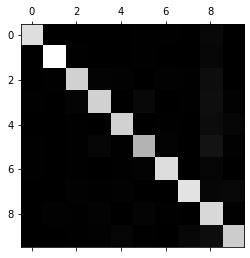

In [60]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [61]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

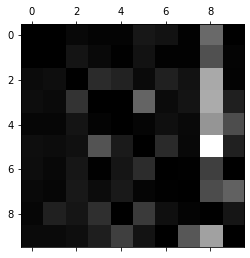

In [62]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

分析单个错误也可以为分类器提供洞察：在做什么？为什么失败？通常更加困难和耗时！

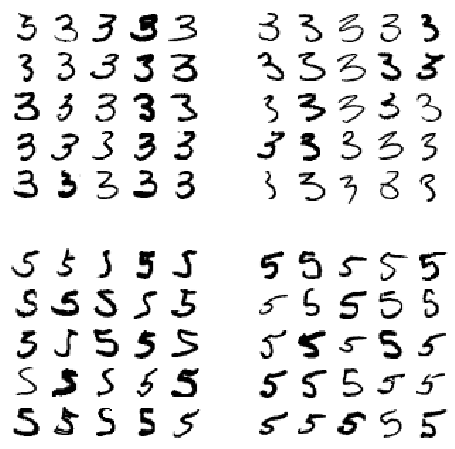

In [64]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

减少数字混淆的方法之一，就是对数字图片对预处理，确保数字位于中心没有旋转，有助于减少错误

# 多标签分类
- 每个实例都在一个类别中，在某些情况下，希望分类器为每个实例输出多个类别
- 例如，人脸识别的分类器，在一张图片中识别出多个人脸，为每个人脸都附上一个标签
- 这样输出多个二元标签的分类系统称之为多标签分类系统


In [65]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

以上这段代码创建了一个 y_multilabel 数组，其中包含两个数字图片的目标标签：
第一个表示数字是否是大数（7 8 9），第二个表示是否为奇数

使用 K-近邻分类器（支持多标签分类），然后使用多个目标数组进行训练，做一个预测，注意输出的两个标签


In [66]:
knn_clf.predict([some_digit])

array([[ True,  True]])

评估多标签分类器的方法很多，选择正确的度量指标取决于项目工程

测量每个标签的F1分数，然后简单的平均

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

这里假设所有的标签都同等重要，实际可能不是这样

简单的做法就是为每一个标签设置一个等价于其自身的权重

只需要添加 average="weihted" 即可

# 多输出分类
- 一种分类任务 : 多输出-多类别分类（简称多输出分类）
- 多标签的泛化，标签也可以是多种类型的
- 构建一些系统去除图片中的噪声
    - 输入一张有噪声的图片，输出一张干净的数字图片（以像素强度的数组作为呈现方式）
    - 这个分类器的输出是多个标签（一个像素点一个标签），每个标签可以有多个值（像素范围 0-255）
    
## 创建训练集和测试集开始
- 使用 numpy 的 randint() 函数为 MNIST 图片的像素强度增加噪声，目标是将图片还原为原始图片

In [2]:
import numpy as np

noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

NameError: name 'X_train' is not defined

In [3]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

NameError: name 'plt' is not defined

In [4]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)


NameError: name 'knn_clf' is not defined